# Introducción al ml con Python 

En esta libreta realizaremos algunos modelos con la base abierta de [New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/version/3), la cuál contiene datos de los alojamientos listados en Airbnb para la ciudad de Nueva York. Realizaremos modelos básicos para predecir el precio de los alojamientos, con base en distitas variables o *features*

## 1. Introducción a *python*

Las libretas de [*Jupyter*](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330) son una excelente forma de realizar informes. Permiten combinar texto y código.

Funciona mediante ventanas denominadas ***chunks***. Para crear un chunk colócate en el lugar en el que deseas crearlo aprieta la tecla ***esc*** y en seguida la letra ***A***, abrebiatura de *after* para agregar un *chunk* encima de la celda en que te encuentras, o bien ***B*** para agregarla debajo.

### Celdas de texto
Una vez en una celda, para habilitarla para texto empleamos la tecla ***esc***, en seguida la tecla ***M*** y ***enter***. Las celdas de texto admiten [lenguaje markdown](https://www.markdownguide.org/cheat-sheet/).
### Celdas de código
Para habilitar código en una celda, teclea ***esc*** y enseguida la tecla ***Y*** y ***enter***.

### Operaciones básicas 
*Python* admite operaciones aritméticas básicas:

In [145]:
print(1+1)
print(2+2)
print(5*3)
print(12/7)
print(12//7)
print(round(12/7))
print(12%7)

2
4
15
1.7142857142857142
1
2
5


También admite operaciones lógicas:

In [146]:
print(True and True)
print(True and False)

True
False


In [147]:
print(True or True)
print(True or False)

True
True


In [148]:
print(not True)

False


### Listas

Además de los datos puntuales, en *python* existen las listas, que son colecciones de datos:

In [149]:
print([1,2,3,4,])

[1, 2, 3, 4]


### Variables

Es posible guardar tanto datos puntuales como listas, asignándolos a variables.

In [150]:
x = 10

In [151]:
print(x)

10


In [152]:
lista = [1,2,3,4,5]

In [153]:
print(lista)

[1, 2, 3, 4, 5]


### Selecció de elementos en una lista

Para seleccionar alguno de los elementos almacenados en una lista invocamos el nombre de la lista y entre corchetes *[ ]* el índice del elemento que deseamos seleccionar. Es importante remarcar, que al igual que la mayoría de los lenguages de programación, *python* es index 0. Lo que quiere decir que el índice del primer elemento de la lista será cero.

In [154]:
lista[0]

1

In [155]:
lista[3]

4

Para seleccionar varios elementos consecutivos de una lista empleamos dos puntos *:*.

In [156]:
lista[0:3]

[1, 2, 3]

In [157]:
lista[3:]

[4, 5]

### Funciones

Además de las operaciones básicas, *python* es capaz de ejecutar [funciones](https://docs.python.org/3/library/functions.html):

In [158]:
print(round(2.5))

2


### Modulos

*Python* contiene definidas solo algunas funciones, lo cuál permite realizar operaciones básicas. Pero los módulos o librerías, que son creados y mantenidos por la comunidad, extienden esas funcionalidades. Para instalar un módulo se requiere seguir la siguiente instrucción:

In [159]:
# !pip install pandas

Solo es necesario instalar los módulos una vez. Posteriormete ya no es necesario volverlas a instalar, y basta con llamarlos. Llamarlos, si es necesario hacerlo en cada libreta que los vaya a usar. Regularmente el llamado a las librerías se hace al comienzo de la libreta.

In [160]:
import pandas as pd
import numpy as np
import jedi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

Las librerías o módulos se llaman empleando la palabra ***library*** seguida de la librería que se desea invocar. Es posible agregar un alias a las librerías empleando la palabra ***as***. Existen algunos álias fijados por convención, como en el caso de *pd* para la librería *pandas*, la cuál se emplea para realizar operaciones con *data frames* o tablas de datos.
Una vez que se ha invocado una librería, es posible acceder a sus funciones llamándola, o bien a su alias, seguida de un punto ***.*** y la función que se desea utilizar.

## Importar datos

La librería *pandas* cuenta con diversas funciones para importar datos a *python*. En este caso emplearemos la función [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html):

In [161]:
df = pd.read_csv('AB_NYC_2019.csv')

Al emplear la librería *pandas* se crea un objeto del tipo *DataFrame*:

In [162]:
type(df)

pandas.core.frame.DataFrame

Este objeto tiene distintos *methods* asosiados útiles para el análisis de datos. A diferencia de las funciones, los *methods* se invocan despues del objeto.

El *method* *shape* devuelve un vector que muestra las dimenciones de la *data frame*, el primer elemento contiene el número de filas de la tabla, y el segundo su número de columnas.

In [163]:
print(df.shape)

(48895, 16)


El *method* *head* muestra las primeras filas de la *dataframe*. Por definición muestra las 5 primeras filas, pero es posible modificar el número de filas mostrado, agregando el número entre paréntesis.

In [164]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Para llamar alguna de las columnas ponemos primero el nombre de la *data frame* seguida de un punto, y el nombre de la columna que queremos invocar.

In [165]:
df.price.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

Es posible seleccionar solo algunas filas y columnas. Para ello empleamos el *method* *loc*. *loc* admite un vector para seleccionar las filas y otro para seleccionar las columnas.

In [166]:
df.loc[:,'name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [167]:
df.loc[0:5,['id', 'host_name']]

,id,host_name
0,2539,John
1,2595,Jennifer
2,3647,Elisabeth
3,3831,LisaRoxanne
4,5022,Laura
5,5099,Chris


In [168]:
df.loc[df.price > 1000,['neighbourhood_group','price']]

,neighbourhood_group,price
496,Manhattan,2000
762,Manhattan,1300
946,Manhattan,3000
1105,Manhattan,1300
1480,Manhattan,2000
...,...,...
48080,Manhattan,1308
48304,Manhattan,2999
48305,Manhattan,1999
48523,Brooklyn,1369


## EDA (Exploratory Data Analisys)

Hasta ahora hemos podido importar la base y realizar algunas operaciones básicas para seleccionar los datos. Ahora seleccionaremos las variables para construir nuestro modelo.

En este ejercicio, nuestro objetivo es predecir el precio alcanzado por un alojamiento, en función de sus características. Primero exploraremos el precio, que es nuestra variable objetivo.

Dado que nuestro objetivo es predecir los precios, eliminaremos las observaciones que no muestren presios.

In [169]:
df = df[df.price != 0]

También eliminaremos las observaciones que no contienen datos en alguna de las características.

In [170]:
df = df.dropna()

In [171]:
df.shape

(38811, 16)

Un primer acercamiento para explorar una variable es analizar su distribución. De esta forma podremos ver si los precios están uniformemente distribuidos, o bien si su distribución se asemeja a una distribución normal. Para crear un histograma empleamos el *method* *hist*, el cuál crea una gráfica llamada *histograma* que muestra la distribución de la variable. En un histograma en el eje de las *X* se muestran los distintos valores de la variable, y en el eje de la *y* la frecuencia con que las observaciones que asumen estos valores. El parámetro *bins* determina el número de barras que tendrá el histograma.

<AxesSubplot:>

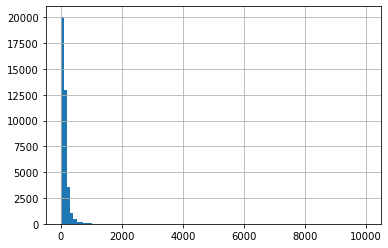

In [172]:
df.price.hist(bins = 100)

El histograma nos muestra que la distribución está sesgada hacia la izquierda, lo que quiere decir que existen muchos alojamientos que cobram poco con relación a los otros, mientras hay unos pocos alojamientos que cobran mucho. Esto puede afectar el desempeño del modelo, debido a que una gran cantidad de alojamientos se encuentran en un rango de precios, y nuestro modelo tartará de asignar algún valor de ese rango casi siempre, lo que lo hará fallar en los rangos de precio más elevados. Una solución común para este problema, que se presenta frecuentemente en el caso de precios del mercado inmoviliario, es realizar una transformación matemática denominada logaritmo. 

In [173]:
df['price_log'] = np.log(df.price)

array([[<AxesSubplot:title={'center':'price_log'}>]], dtype=object)

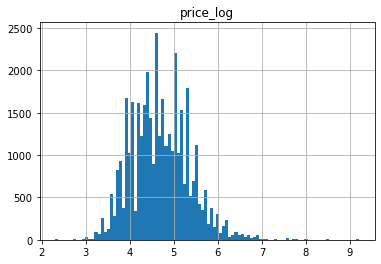

In [174]:
df.loc[:, ['price_log']].hist(bins = 100)

Tras realizar la transformación, nos damos cuenta que la distribución se asemeja un poco más a la distribución normal.

### Variables independientes

Las variables independientes son aquellas características que están relacionadas con la variable objetivo, y que nos permiten predecirla. Para escogerlas debemos emplear tanto el sentido común como los conceptos teóricos que nos permitan conocer que determina el precio de un alojamiento.

Seleccionamos las siguientes variables:

- **neighbourhood_group**: Indica el lugar en el que están ubicados los alojamientos. (categórica)
- **room_type**: Indica el tipo de alojamiento. (categórica)
- **minimum_nights**: Mínimo de noches que pueden ser reservadas. (enteros)
- **number_of_reviews**: Número de reseñas. (enteros)
- **reviews_per_month**: Reseñas por mes. (flotante)
- **availability_365**: Números al año de disponibilidad. (enteros).

### Variables categóricas

Los modelos no admiten texto. Por lo que es necesario realizar alguna transformación previa para ingresarlas como datos numéricos. Las variables categóricas compuestas por texto, pueden ser codificadas asignando un número a cada opción. También pueden ser transformadas en variables [dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), que asignan un valor de *1*, cuando una de las opciones están presentes o *0* cuando no lo están. Esta transformación implica crear tantas variables como opciones existan.

In [175]:
df['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16430
Queens            4572
Bronx              874
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [176]:
df['room_type'].value_counts()

Entire home/apt    20320
Private room       17647
Shared room          844
Name: room_type, dtype: int64

In [177]:
variables_dummy = pd.get_dummies(df[['neighbourhood_group','room_type']])

In [178]:
variables_dummy.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0
5,0,0,1,0,0,1,0,0


Con esta transformación ya podemos construir nuestras series de variables. La variable dependiente suele denotarce con **y** y las variables dependientes con **X**.

In [179]:
y = df['price_log']

Para crear nuestro *set* de variables dependientes empleamos la función [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html), que nos permite unir dos tablas con iguales dimenciones. El argumento *axis = 1* indica que deseamos unir las columnas.

In [180]:
X = pd.concat([variables_dummy, df.loc[:,['minimum_nights','number_of_reviews','reviews_per_month','availability_365']]], axis=1)

In [181]:
X.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,1,0,0,0,0,1,0,1,9,0.21,365
1,0,0,1,0,0,1,0,0,1,45,0.38,355
3,0,1,0,0,0,1,0,0,1,270,4.64,194
4,0,0,1,0,0,1,0,0,10,9,0.10,0
5,0,0,1,0,0,1,0,0,3,74,0.59,129


Ahora que hemos decidido cuál será nuestra variable dependientes, es decir la que deseamos predecir, y cuales serán nuestras variables independientes, es necesario analizar que tan correlacionadas están. La correlación es una medida que nos permite estimar que tan relacionadas están dos variables.

In [182]:
pd.concat([X,y],axis=1).corr()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price_log
neighbourhood_group_Bronx,1.000000,-0.130048,-0.131363,-0.055465,-0.013708,-0.052016,0.043805,0.028569,-0.016880,0.009664,0.041968,0.065941,-0.113911
neighbourhood_group_Brooklyn,-0.130048,1.000000,-0.741530,-0.313092,-0.077380,-0.046374,0.053771,-0.024775,-0.027112,0.005031,-0.045882,-0.059855,-0.166044
neighbourhood_group_Manhattan,-0.131363,-0.741530,1.000000,-0.316259,-0.078163,0.131349,-0.131176,-0.001945,0.056972,-0.035307,-0.052219,-0.037025,0.332156
neighbourhood_group_Queens,-0.055465,-0.313092,-0.316259,1.000000,-0.033002,-0.104296,0.096171,0.028810,-0.034594,0.038146,0.123699,0.100636,-0.188381
neighbourhood_group_Staten Island,-0.013708,-0.077380,-0.078163,-0.033002,1.000000,-0.008292,0.009373,-0.003606,-0.012715,0.013995,0.026845,0.063278,-0.052354
room_type_Entire home/apt,-0.052016,-0.046374,0.131349,-0.104296,-0.008292,1.000000,-0.957234,-0.156297,0.073306,-0.016361,-0.041405,-0.028516,0.634966
room_type_Private room,0.043805,0.053771,-0.131176,0.096171,0.009373,-0.957234,1.000000,-0.136146,-0.069682,0.022285,0.038889,0.011424,-0.584302
room_type_Shared room,0.028569,-0.024775,-0.001945,0.028810,-0.003606,-0.156297,-0.136146,1.000000,-0.013127,-0.020055,0.009019,0.058646,-0.179502
minimum_nights,-0.016880,-0.027112,0.056972,-0.034594,-0.012715,0.073306,-0.069682,-0.013127,1.000000,-0.069312,-0.121653,0.101609,0.019322
number_of_reviews,0.009664,0.005031,-0.035307,0.038146,0.013995,-0.016361,0.022285,-0.020055,-0.069312,1.000000,0.549594,0.193363,-0.024615


La matriz de correlación nos permite estimar si existe relación aparente entre dos variables. Los valores cercanos a uno indican una alta correlación, mientras que los cercanos a cero indican que aparentemente las variables no están relacionadas. El signo indica si la relación entre las variables es directa cuando es positivo, o inversa, cuando es negativo.
En ocaciones una gráfica de temperatura de color nos permite identificar de forma más fácil si algunas de las variables estan correlacionadas.

<AxesSubplot:>

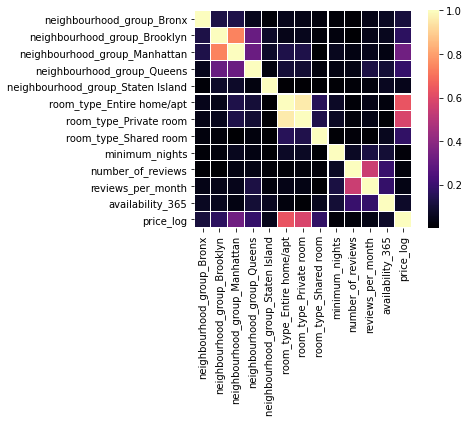

In [183]:
sns.heatmap(np.abs(pd.concat([X,y],axis=1).corr()), linewidth=0.1, square=True, cmap='magma')

El correlograma muestra como en general las variables no están tan relacionadas entre si, con excepción quiza de *Entire home/apt* y *Private room*, que presentan una correlación de 0.953470, pero considerando que ambas provienen de una variable categórica es razonable que estén relacionadas. Nos quedaremos únicamente con *Entire home/apt* para ajustar nuestro modelo.

In [184]:
X.columns

Index(['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365'],
      dtype='object')

In [185]:
X = X.loc[:, X.columns != 'room_type_Private room']  
X = X.loc[:, X.columns != 'neighbourhood_group_Brooklyn']

<AxesSubplot:>

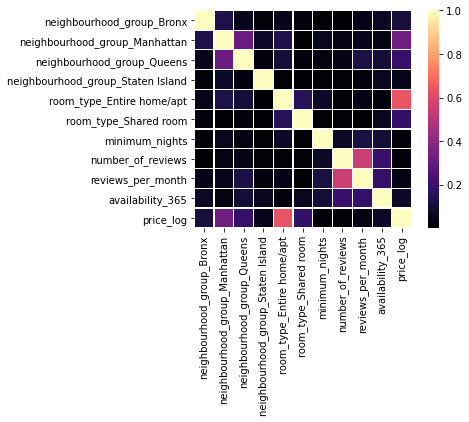

In [186]:
sns.heatmap(np.abs(pd.concat([X,y],axis=1).corr()), linewidth=0.1, square=True, cmap='magma')

## Train y Test

Ya que hemos seleccionado las variables, el siguiente paso es dividirlas en las bases de entrenamiento y de prueba. El modelo se ajusta en la base de entrenamiento *traning set*, y se evalúa en la base de prueba *test set*. Esto con el fin de no predisponer el modelo, y evaluar sobre datos que aún no han sido vistos por el modelo. Regularmente se emplea el 80% de los datos para el *training set* y el 20% restante para el *test set*. 

Para realizar esta partición de forma aleatoria, emplearemos la función *train_test_split* de la librería *sklearn*.

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [188]:
X_train.shape

(29108, 10)

In [189]:
y_train.shape

(29108,)

In [190]:
X_test.shape

(9703, 10)

## Creación del modelo

Ahora que ya hemos seleccionado y preparado nuestras variables objetivo e independientes, el siguiente punto es crear un objeto con el modelo que vamos a emplear. Empezaremos con un modelo de regresión lineal.

In [191]:
lm = LinearRegression()

Después empleamos la *trining set* para ajustar el modelo.

In [192]:
lm.fit(X_train, y_train)

LinearRegression()

Los coeficientes del modelo se alojan en la *property coef_*.

In [193]:
lm.coef_

array([-2.82121384e-01,  3.03116971e-01, -1.46253639e-01, -3.03598242e-01,
        7.76521685e-01, -4.27164230e-01, -2.21086480e-03, -4.74752278e-04,
       -9.23414391e-04,  6.83493855e-04])

Ya que tenemos la predicción del modelo emplearemos el *test set*  para saber que tan bien ajustó el modelo. Los modelos de regresión lineal se evaluán empleando la métrica de $R^2$. Entre más cercano a uno se encuentre este parámetro, mejor capacidad de predicción tendrá el modelo. 

In [194]:
lm.score(X_test, y_test)

0.5065975230933439

In [195]:
lm.score(X_train, y_train)

0.4953854094668757

In [196]:
rm = Ridge(alpha=1)

In [197]:
rm.fit(X_train, y_train)

Ridge(alpha=1)

In [198]:
rm.score(X_test, y_test)

0.5065936679692502

In [199]:
rm.score(X_train, y_train)

0.4953853400082826

Probamos una regreción lineal con penalización y sin embargo el score no mejoró significativamente. Por lo que nos quedamos con los resultados de la regresión lineal. Finalmente probaremos un modelo del tipo árbol de desición, el cuál además es capaz de indicarnos la importancia de cada *feature* para predecir el precio.

In [200]:
tree = DecisionTreeRegressor(max_depth=4, random_state=0)

In [201]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [202]:
tree.score(X_test, y_test)

0.5012207908454442

## Resultados

In [203]:
X.columns

Index(['neighbourhood_group_Bronx', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Shared room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365'],
      dtype='object')

Tras el análisis ahora tenemos un modelo que es capaz de predecir el precio de los alojamientos con relación a sus características. El análisis de correlación entre variables, ya nos había mostrado que la variable de precio estaba correlacionada con la variable *room_type_Entire home/apt*, y el modelo de árboles de desición, nos permite corrovorarlo. Una vez que ha sido ajustado el modelo, la *property feature_importances_* nos devuelve un vector con la importancia asignada a cada *feature*:

In [204]:
tree.feature_importances_

array([0.        , 0.12581631, 0.00485992, 0.        , 0.80179115,
       0.01491557, 0.01312493, 0.        , 0.004869  , 0.03462311])

Para tener una mejor comprención de este vector conviene graficarlo:

(-1.0, 10.0)

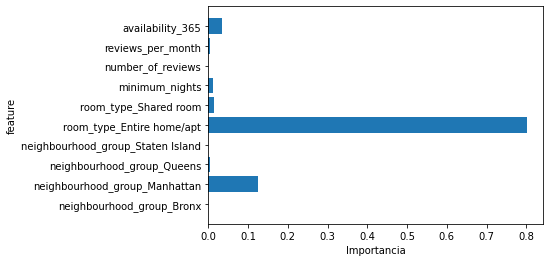

In [205]:
n_features = X.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Importancia")
plt.ylabel("feature")
plt.ylim(-1, n_features)

La gráfica muestra como la variable más importante es si el alojamiento es una casa o apartamento completo. Las casas o departamentos que se rentan para su ocupación total suelen cotizarce en los precios más altos. La ubicación también es importante. Los departamentos ubicados en Manhatan suelen estar mejor pagados. Otras características que están relacionadas con el precio es si la locación está disponible los 365 días del año, y si se exige un mínimo de noches para reservar. 
Teniendo esto en mente, realicemos el ejercicio de proponer un departamento, y verificar el posible precio al que podría ser anunicado.

In [206]:
X.columns

Index(['neighbourhood_group_Bronx', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Shared room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365'],
      dtype='object')

Supongamos que el departamento se ubica en *Staten Island*, que se trata de un cuarto compartido, *Shared room*, que pedimos cuando menos dos noches en reserva *minimum_nights*, contamos con 10 reseñas *number_of_reviews*, más o menos una por mes *reviews_per_month*, y que nuestra habitación está disponible todo el año *availability_365*.

In [207]:
mi_apartamento = {'neighbourhood_group_Bronx':[0], 'neighbourhood_group_Manhattan':[0],
       'neighbourhood_group_Queens':[0], 'neighbourhood_group_Staten Island':[1],
       'room_type_Entire home/apt':[0], 'room_type_Shared room':[1], 'minimum_nights':[2],
       'number_of_reviews':[10], 'reviews_per_month':[1], 'availability_365':[365]}

In [208]:
mi_apartamento = pd.DataFrame(mi_apartamento)

In [209]:
mi_apartamento.head()

,neighbourhood_group_Bronx,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Shared room,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,0,0,1,0,1,2,10,1,365


In [210]:
mi_apartamento_precio = lm.predict(mi_apartamento)

In [211]:
print(mi_apartamento_precio)

[3.6566135]


Pero recordemos que el precio por ahora está expresado en log, para obtenerlo en dólares es necesario realizar una transformación.

In [212]:
mi_apartamento_precio =np.exp(mi_apartamento_precio)

In [213]:
print(mi_apartamento_precio)

[38.72996144]


De acuerdo a nuestro modelo, este es el precio que deberíamos poner a un alojamiento con las características descritas en la ciudad de NY.